In [94]:
#Importacion de librerio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json



```
# Esto tiene formato de código
```

#📌 Extracción

In [95]:
#Tranformaremos nuestro archivo Json en un DataFrame
df = pd.read_json('/content/datos/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [96]:
#Normalizaremos la columna Cliente
df_normalizado_customer = pd.json_normalize(df['customer'], meta =['customerID'])
df_normalizado_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [97]:
#Normalizaremos la columna phone
df_normalizado_phone = pd.json_normalize(df['phone'])
df_normalizado_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [98]:
#Normalizaremos la columna Internet
df_normalizado_internet = pd.json_normalize(df['internet'])
df_normalizado_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [99]:
#Normalizaremos la Cuenta account
df_normalizado_account = pd.json_normalize(df['account'])
df_normalizado_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


datos_normalizados = pd.concat([df, df_normalizado], axis=1)
datos_normalizados.head()

#🔧 Transformación

In [100]:
#Vamos a concatenar los DataFrame Normalizados
datos_normalizados = pd.concat([df, df_normalizado_customer, df_normalizado_phone, df_normalizado_internet, df_normalizado_account], axis=1)
datos_normalizados.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [101]:
#Procederemos a borrar las columnas customer, phone, internet, account
datos_normalizados.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [102]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [103]:
# Lo primeros que haremos sera (ver los datos relevantes que usaremos para nuestro reporte de ANALISIS DE CLIENTE Y DIFELIZACION)
# Vamos a mostrat los 20 primeros CustomerID, tenure, Churn, Contract
datos_normalizados[['customerID', 'tenure', 'Churn', 'Contract','Dependents','TechSupport','PhoneService','MultipleLines','InternetService']].head(8)

,customerID,tenure,Churn,Contract,Dependents,TechSupport,PhoneService,MultipleLines,InternetService
0,0002-ORFBO,9,No,One year,Yes,Yes,Yes,No,DSL
1,0003-MKNFE,9,No,Month-to-month,No,No,Yes,Yes,DSL
2,0004-TLHLJ,4,Yes,Month-to-month,No,No,Yes,No,Fiber optic
3,0011-IGKFF,13,Yes,Month-to-month,No,No,Yes,No,Fiber optic
4,0013-EXCHZ,3,Yes,Month-to-month,No,Yes,Yes,No,Fiber optic
5,0013-MHZWF,9,No,Month-to-month,Yes,Yes,Yes,No,DSL
6,0013-SMEOE,71,No,Two year,No,Yes,Yes,No,Fiber optic
7,0014-BMAQU,63,No,Two year,No,Yes,Yes,Yes,Fiber optic


In [104]:
#Vamos a guardar el nombre las columnas en una lista
columnas = datos_normalizados.columns.tolist()
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [105]:
datos = datos_normalizados.explode(columnas[3:])
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [106]:
#Vamos a resetear el indice
datos.reset_index(drop=True, inplace=True)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [107]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [108]:
#Ahora cambiaremos el tipo de datos de Chrum
datos['Churn'] = datos['Churn'].astype('str')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [109]:
#Vamos a dar formato float64 a la columna float64
datos['Charges.Monthly'] = datos['Charges.Monthly'].astype('float64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [110]:
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', np.nan)
datos['Charges.Total'] = datos['Charges.Total'].astype('float64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [111]:
datos['tenure'] = datos['tenure'].astype('int64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [112]:
#Vamos a mostrat los 20 primeros CustomerID, tenure, Churn, Contract
datos[['customerID', 'tenure', 'Churn', 'Contract','Dependents','TechSupport','PhoneService','MultipleLines','InternetService']].head(8)

,customerID,tenure,Churn,Contract,Dependents,TechSupport,PhoneService,MultipleLines,InternetService
0,0002-ORFBO,9,No,One year,Yes,Yes,Yes,No,DSL
1,0003-MKNFE,9,No,Month-to-month,No,No,Yes,Yes,DSL
2,0004-TLHLJ,4,Yes,Month-to-month,No,No,Yes,No,Fiber optic
3,0011-IGKFF,13,Yes,Month-to-month,No,No,Yes,No,Fiber optic
4,0013-EXCHZ,3,Yes,Month-to-month,No,Yes,Yes,No,Fiber optic
5,0013-MHZWF,9,No,Month-to-month,Yes,Yes,Yes,No,DSL
6,0013-SMEOE,71,No,Two year,No,Yes,Yes,No,Fiber optic
7,0014-BMAQU,63,No,Two year,No,Yes,Yes,Yes,Fiber optic


In [113]:
#Tranformaremos la columna Churn en string
datos['Churn'] = datos['Churn'].astype('str')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [114]:
datos['Churn'] = datos['Churn'].str.replace(r'[^a-zA-Z0-9\-\']', ' ', regex=True)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [115]:
#Transformare la columna Churn en string
datos['Churn'] = datos['Churn'].astype('str')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [116]:
#Ahora guardaremos nuestro DataFrame llamado datos en formato JSON
datos.to_json('datos_normalizados.json')

#📊 Carga y análisis

In [117]:
#Vamos a cargar nuestros datos normalizados
df = pd.read_json('/content/datos_normalizados.json')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# **Primer Analisis **
¿Cuantos clientes son dependietes de nuestro servicio?
Clientes que solo poseen nuestros servicios y no dependen de otros proveedores

In [118]:
#Vamos a analizar las columnas Dependents, PhoneService, MultipleLines, InternetService
df[['Dependents', 'PhoneService', 'MultipleLines', 'InternetService']].head()

,Dependents,PhoneService,MultipleLines,InternetService
0,Yes,Yes,No,DSL
1,No,Yes,Yes,DSL
2,No,Yes,No,Fiber optic
3,No,Yes,No,Fiber optic
4,No,Yes,No,Fiber optic


In [119]:
#Vamos a contar cuanto clientes son Dependientes (Yes)
df['Dependents'].value_counts()

,count
Dependents,
No,5086
Yes,2181


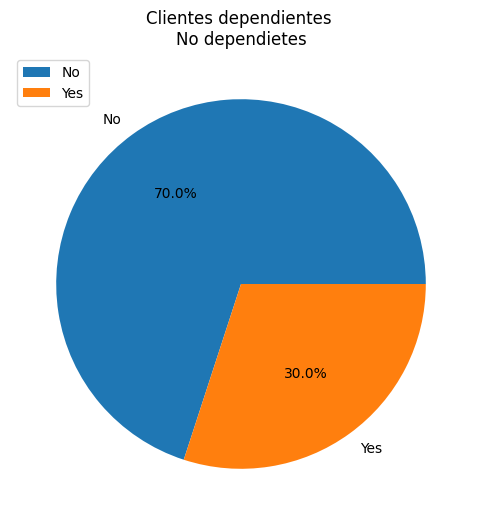

In [120]:
plt.figure(figsize=(10,6))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.title('Clientes dependientes \nNo dependietes')
plt.show()

# **Segundo Analisis**
Vamos analizar los tipos de contratos que poseen nuestros clientes

In [124]:
df.head()

,customerID,tenure,Churn,Contract,Dependents,TechSupport,PhoneService,MultipleLines,InternetService
0,0002-ORFBO,9,No,One year,Yes,Yes,Yes,No,DSL
1,0003-MKNFE,9,No,Month-to-month,No,No,Yes,Yes,DSL
2,0004-TLHLJ,4,Yes,Month-to-month,No,No,Yes,No,Fiber optic
3,0011-IGKFF,13,Yes,Month-to-month,No,No,Yes,No,Fiber optic
4,0013-EXCHZ,3,Yes,Month-to-month,No,Yes,Yes,No,Fiber optic


In [125]:
#Vamos a contabilizar y analizar el periodos de los contratos de los clientes
df['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


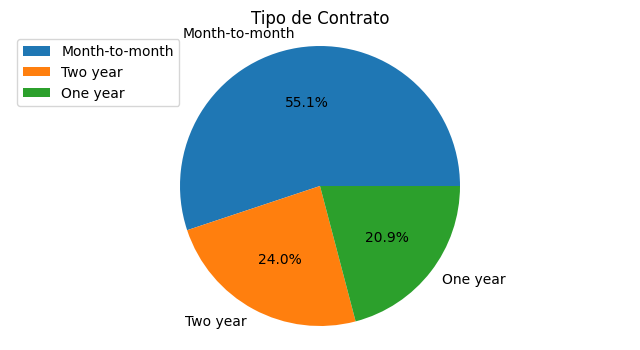

In [177]:
#Cearemos el grafico mostrando ¿Que tipo de contrato son mas recurrente?
plt.figure(figsize=(8,4))

plt.title('Tipo de Contrato')
plt.pie(df['Contract'].value_counts(), labels=df['Contract'].value_counts().index, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

# **Tercer analisis **
Vamos a contabilizar nuestros servicios y cuales son los mas contratados

In [137]:
df[['PhoneService', 'MultipleLines', 'InternetService']].head()

,PhoneService,MultipleLines,InternetService
0,Yes,No,DSL
1,Yes,Yes,DSL
2,Yes,No,Fiber optic
3,Yes,No,Fiber optic
4,Yes,No,Fiber optic


In [140]:
#Vamos a contabilizar la canridad de servicios principales contratados
for col in ['PhoneService', 'MultipleLines','InternetService']:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 20)

Value counts for column: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
--------------------
Value counts for column: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
--------------------
Value counts for column: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
--------------------


In [143]:
#Crearemos una lista con InternetService en el cual refleje los servicios
internet_services = ['DSL', 'Fiber optic', 'No']


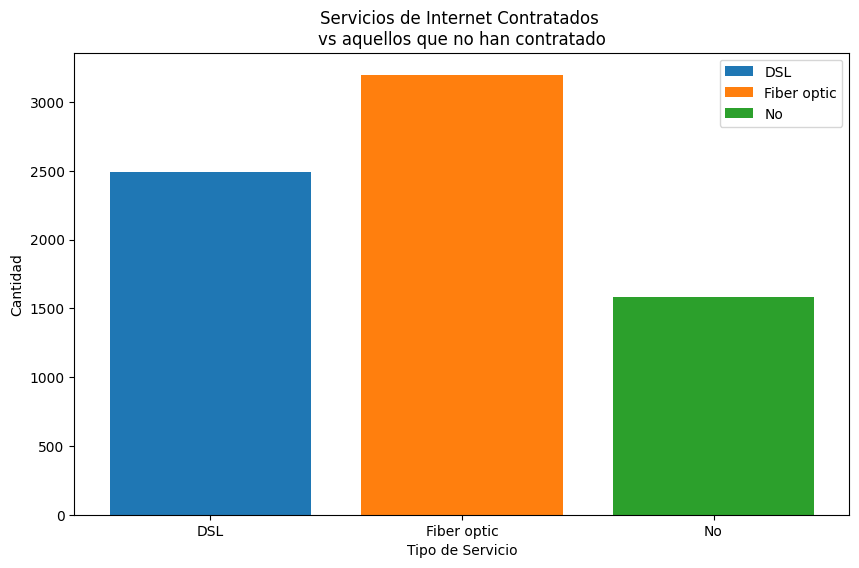

In [162]:
#Crearemos un grafico de barra personalidado
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, ax = plt.subplots(figsize=(10,6))

for i, service in enumerate(internet_services):
    counts = df[df['InternetService'] == service]['InternetService'].value_counts()
    ax.bar(counts.index, counts.values, label=service, color=colores[i])

plt.title('Servicios de Internet Contratados \nvs aquellos que no han contratado')
plt.xlabel('Tipo de Servicio')
plt.ylabel('Cantidad')
plt.legend()

plt.show()



# **Cuarto analsis**

Realizaremos un estduio de los servicios de streaming

In [166]:
df_Streaming = datos_normalizados[['customerID', 'tenure', 'Churn', 'Contract','Dependents','TechSupport','PhoneService','MultipleLines','InternetService', 'StreamingTV', 'StreamingMovies']]
df_Streaming.head()

,customerID,tenure,Churn,Contract,Dependents,TechSupport,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies
0,0002-ORFBO,9,No,One year,Yes,Yes,Yes,No,DSL,Yes,No
1,0003-MKNFE,9,No,Month-to-month,No,No,Yes,Yes,DSL,No,Yes
2,0004-TLHLJ,4,Yes,Month-to-month,No,No,Yes,No,Fiber optic,No,No
3,0011-IGKFF,13,Yes,Month-to-month,No,No,Yes,No,Fiber optic,Yes,Yes
4,0013-EXCHZ,3,Yes,Month-to-month,No,Yes,Yes,No,Fiber optic,Yes,No


In [167]:
#Gardaremos el nuevo dataframe en formato JSON
df_Streaming.to_json('df_Streaming.json')

In [168]:
#Cargaremos el nuevo dataframe
df = pd.read_json('/content/df_Streaming.json')
df.head()

,customerID,tenure,Churn,Contract,Dependents,TechSupport,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies
0,0002-ORFBO,9,No,One year,Yes,Yes,Yes,No,DSL,Yes,No
1,0003-MKNFE,9,No,Month-to-month,No,No,Yes,Yes,DSL,No,Yes
2,0004-TLHLJ,4,Yes,Month-to-month,No,No,Yes,No,Fiber optic,No,No
3,0011-IGKFF,13,Yes,Month-to-month,No,No,Yes,No,Fiber optic,Yes,Yes
4,0013-EXCHZ,3,Yes,Month-to-month,No,Yes,Yes,No,Fiber optic,Yes,No


In [169]:
for col in ['StreamingTV', 'StreamingMovies']:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 20)

Value counts for column: StreamingTV
StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64
--------------------
Value counts for column: StreamingMovies
StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64
--------------------


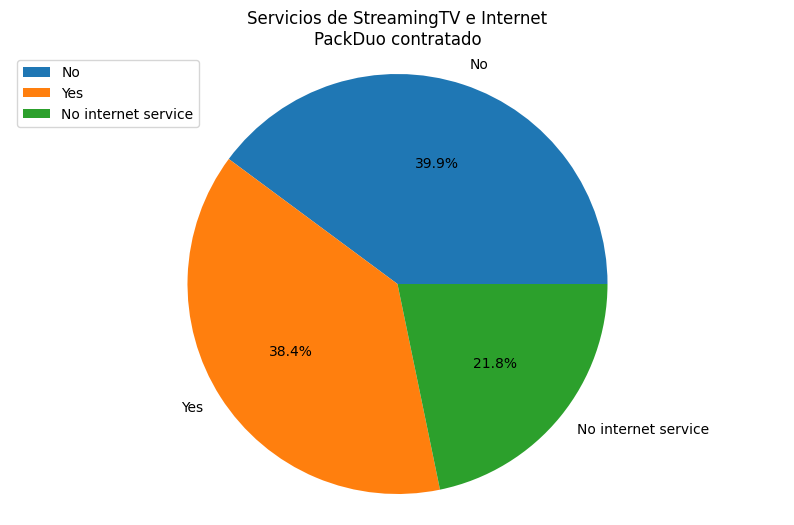

In [174]:
#Realizaremos 1 graficos el cual nos muestre Cuantas personas poseen este servicios de StreamingTV
plt.figure(figsize=(10,6))
plt.title('Servicios de StreamingTV e Internet\nPackDuo contratado')
plt.pie(df['StreamingTV'].value_counts(), labels=df['StreamingTV'].value_counts().index, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

#📄Informe final

# **Resultado**

Nuestras graficas podemos apreciar los servicios que han contratado los clientes, y que servicios estan entrelazados y sobre todo que porcentaje tiene nuestros competidores en aquellos servicios no contratados

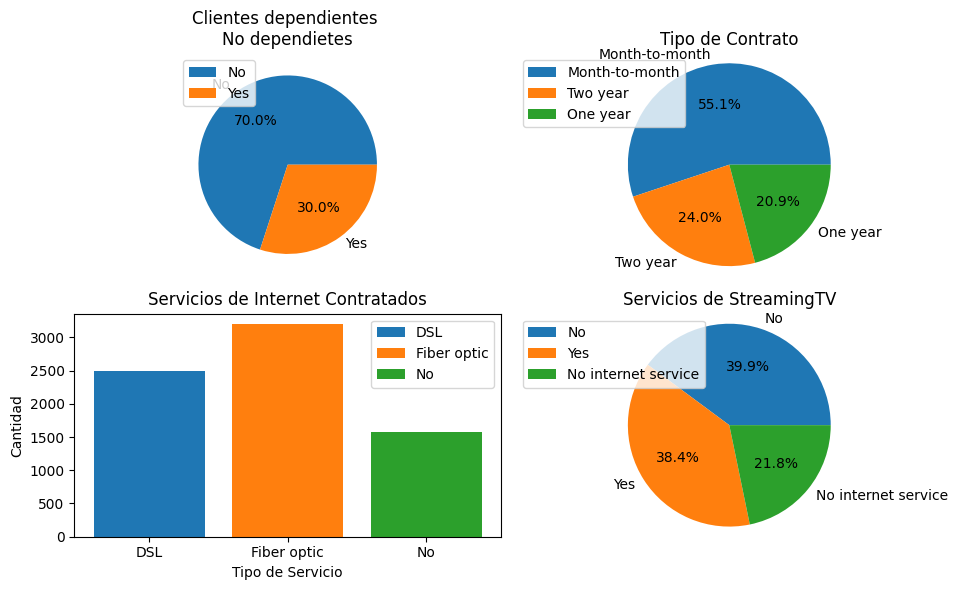

In [184]:
#Juntaremos los 4 graficos realizados
fig, axs = plt.subplots(2, 2, figsize=(10,6))

#Clientes que dependientes (aquellos que depen 100% de nuestros servicios)
# Removed .plot from the calls to pie, legend, and title
axs[0, 0].pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, autopct='%1.1f%%')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('Clientes dependientes \nNo dependietes') # Use set_title for Axes objects

#Bajo el concepto de los servicios dependientes contratados (cual es tipo de contrato que se maneja)
# Removed .plot from the calls to title, pie, legend, and axis
axs[0, 1].set_title('Tipo de Contrato') # Use set_title for Axes objects
axs[0, 1].pie(df['Contract'].value_counts(), labels=df['Contract'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].legend(loc='upper left')
axs[0, 1].axis('equal')

# Add the other two plots to the remaining subplots in axs
# For example, assuming you want to plot the internet service counts and streaming TV counts
internet_services = ['DSL', 'Fiber optic', 'No']
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, service in enumerate(internet_services):
    counts = df[df['InternetService'] == service]['InternetService'].value_counts()
    axs[1, 0].bar(counts.index, counts.values, label=service, color=colores[i])

axs[1, 0].set_title('Servicios de Internet Contratados')
axs[1, 0].set_xlabel('Tipo de Servicio')
axs[1, 0].set_ylabel('Cantidad')
axs[1, 0].legend()


axs[1, 1].pie(df['StreamingTV'].value_counts(), labels=df['StreamingTV'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('Servicios de StreamingTV')
axs[1, 1].axis('equal')


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


In [186]:
#Lo guaremos el resultado de nuestros graficos en un archivo PNG
fig.savefig('informe_final.png')